 # QCTO - Workplace Module

<h1 style="color:darkgreen;">Avocado Prices and Sales Volume Analysis (2015-2023)</h1>


## Done By: Mahlatse Lelosa
© ExploreAI 2024

![](avocado.png)

# <span style="color:darkgreen;">Table of Contents</span>

1. [<span style="color:darkgreen;">Introduction</span>](#introduction)
2. [<span style="color:darkgreen;">Importing Packages</span>](#importing-packages)
3. [<span style="color:darkgreen;">Data Collection and Description</span>](#data-collection-and-description)
4. [<span style="color:darkgreen;">Loading Data</span>](#loading-data)
5. [<span style="color:darkgreen;">Data Cleaning and Filtering</span>](#data-cleaning-and-filtering)
6. [<span style="color:darkgreen;">Exploratory Data Analysis (EDA)</span>](#exploratory-data-analysis-eda)
7. [<span style="color:darkgreen;">Modeling</span>](#modeling)
8. [<span style="color:darkgreen;">Evaluation and Validation</span>](#evaluation-and-validation)
9. [<span style="color:darkgreen;">Final Model</span>](#final-model)
10. [<span style="color:darkgreen;">Conclusion and Future Work</span>](#conclusion-and-future-work)
11. [<span style="color:darkgreen;">References</span>](#references)


<h2 id="introduction" style="color:darkgreen;">Introduction</h2>

This project aims to analyze the avocado market in the U.S. by studying the prices and sales volumes from 2015 to 2023. The goal is to uncover trends, correlations, and patterns that could inform future market decisions.

Avocados have become increasingly popular in recent years, leading to fluctuations in prices and sales volumes. Understanding these trends is crucial for stakeholders in the agriculture and retail sectors. This project will also explore the differences across various regions.


<h2 id="importing-packages" style="color:darkgreen;">Importing Packages</h2>


Set up the Python environment with necessary libraries and tools.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


<h2 id="data-collection-and-description" style="color:darkgreen;">Data Collection and Description</h2>

<h2 id="loading-data" style="color:darkgreen;">Loading Data</h2>

In [3]:
# Loading the dataset
df = pd.read_csv('avocado.csv')
# Displaying the first few rows
print(df.head())


         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington  


<h2 id="data-cleaning-and-filtering" style="color:darkgreen;">Data Cleaning and Filtering</h2>

Inspect the Data
Check the initial state of the data

In [4]:
# Check the data types and non-null values
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,53415.000000,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,4.102500e+04,4.102500e+04,41025.000000
mean,1.428910,8.694474e+05,2.982707e+05,2.222170e+05,2.053195e+04,2.175083e+05,1.039222e+05,2.331316e+04,2731.811796
std,0.393116,3.545274e+06,1.307669e+06,9.554624e+05,1.040977e+05,8.676947e+05,5.692608e+05,1.496622e+05,22589.096454
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.119091,1.626465e+04,6.947250e+02,2.120800e+03,0.000000e+00,7.846520e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.400000,1.203525e+05,1.458058e+04,1.751663e+04,9.005000e+01,3.695310e+04,6.945800e+02,0.000000e+00,0.000000
75%,1.690000,4.542380e+05,1.287924e+05,9.351560e+04,3.599735e+03,1.110146e+05,3.795298e+04,2.814920e+03,0.000000
max,3.440830,6.103446e+07,2.544720e+07,2.047057e+07,2.860025e+06,1.629830e+07,1.256716e+07,4.324231e+06,679586.800000


Handle Missing Values
Decide how to handle missing values: removal, imputation

In [5]:
print(df.isnull().sum())


Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64


I have missing values in the columns SmallBags, LargeBags, and XLargeBags, with 12,390 missing values in each. Since there are no missing values in the other columns, I will handle these missing values without dropping rows.

Handling Missing Values:
Fill with a Default Value: I will fill the missing values with 0, assuming that missing values mean no bags were sold for that category

In [6]:
# Filling missing values in bag columns with 0
df_cleaned = df.copy()  # Create a cleaned copy of the original dataframe
df_cleaned['SmallBags'].fillna(0, inplace=True)
df_cleaned['LargeBags'].fillna(0, inplace=True)
df_cleaned['XLargeBags'].fillna(0, inplace=True)

# Verify missing values are handled
print(df_cleaned.isnull().sum())



Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
region          0
dtype: int64


 Remove Duplicates

In [7]:
# Remove duplicate rows
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df_cleaned = df_cleaned.drop_duplicates()

# Check the shape of the data after removing duplicates
print(df_cleaned.shape)



Number of duplicate rows: 0
(53415, 12)


 Correct Data Types

 Convert columns to their appropriate data types. For example, the Date column should be in datetime format, and AveragePrice should be a float

In [8]:
# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Convert 'AveragePrice' to float
df_cleaned['AveragePrice'] = df_cleaned['AveragePrice'].astype(float)

# Verify the changes
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53415 non-null  datetime64[ns]
 1   AveragePrice  53415 non-null  float64       
 2   TotalVolume   53415 non-null  float64       
 3   plu4046       53415 non-null  float64       
 4   plu4225       53415 non-null  float64       
 5   plu4770       53415 non-null  float64       
 6   TotalBags     53415 non-null  float64       
 7   SmallBags     53415 non-null  float64       
 8   LargeBags     53415 non-null  float64       
 9   XLargeBags    53415 non-null  float64       
 10  type          53415 non-null  object        
 11  region        53415 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 4.9+ MB


Filter Outliers

Outliers can distort statistical analyses and model performance. A common way to detect outliers is using the Z-score method

In [9]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df_cleaned.select_dtypes(include=[np.number])))

# Keep only rows where Z-score is less than 3 (commonly used threshold)
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

# Check the shape of the data after filtering outliers
print(df_cleaned.shape)



(51731, 12)


Feature Engineering

Create new features to enhance your analysis. For example, extracting Year and Month from the Date column can help in time-series analysis.



In [10]:
# Create new features for Year and Month
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Verify the new features
print(df_cleaned[['Date', 'Year', 'Month']].head())


        Date  Year  Month
0 2015-01-04  2015      1
1 2015-01-04  2015      1
2 2015-01-04  2015      1
3 2015-01-04  2015      1
4 2015-01-04  2015      1


Data Normalization/Standardization




In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize 'AveragePrice' and 'TotalVolume' columns
scaler = StandardScaler()
df_cleaned[['AveragePrice', 'TotalVolume']] = scaler.fit_transform(df_cleaned[['AveragePrice', 'TotalVolume']])

# Verify the scaled values
print(df_cleaned[['AveragePrice', 'TotalVolume']].head())


   AveragePrice  TotalVolume
0     -0.551432    -0.414980
1      0.936108    -0.452494
2     -1.125571    -0.040647
3      0.857817    -0.450145
4     -0.916793     0.294609


This shows that:

Values of AveragePrice and TotalVolume are standardized.
Negative values indicate that the original data points were below the mean.
Positive values indicate the original data points were above the mean

In [12]:
# Display the final cleaned dataset
print(df_cleaned.head())

# Check the shape of the cleaned dataset
print(df_cleaned.shape)


        Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0 2015-01-04     -0.551432    -0.414980    2819.50   28287.42     49.90   
1 2015-01-04      0.936108    -0.452494      57.42     153.88      0.00   
2 2015-01-04     -1.125571    -0.040647  364302.39   23821.16     82.15   
3 2015-01-04      0.857817    -0.450145    1500.15     938.35      0.00   
4 2015-01-04     -0.916793     0.294609   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  Year  Month  
0               Albany  2015      1  
1               Albany  2015      1  
2              Atlanta  2015      1  
3           

Results:

A cleaned dataset with 51,731 rows and 14 columns.

The AveragePrice and TotalVolume columns are standardized, as seen in the transformed values.

The rest of the columns (plu4046, plu4225, plu4770, TotalBags, etc.) retain their original values.

<h2 id="exploratory-data-analysis-eda" style="color:darkgreen;">Exploratory Data Analysis (EDA)</h2>


#### Summary Statistics and Data Distribution



                                Date  AveragePrice   TotalVolume  \
count                          51731  5.173100e+04  5.173100e+04   
mean   2019-07-23 19:27:30.623417600 -5.260634e-16 -1.909212e-17   
min              2015-01-04 00:00:00 -2.587014e+00 -4.537184e-01   
25%              2017-05-21 00:00:00 -8.007127e-01 -4.388505e-01   
50%              2019-08-11 00:00:00 -5.558543e-02 -3.461652e-01   
75%              2021-10-03 00:00:00  6.848039e-01 -6.474168e-02   
max              2023-12-03 00:00:00  3.067125e+00  8.900824e+00   
std                              NaN  1.000010e+00  1.000010e+00   

            plu4046       plu4225        plu4770     TotalBags     SmallBags  \
count  5.173100e+04  5.173100e+04   51731.000000  5.173100e+04  5.173100e+04   
mean   1.598492e+05  1.203970e+05    8962.873793  1.216317e+05  3.906842e+04   
min    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%    6.494000e+02  1.984905e+03       0.000000  7.656850e+03  0.0

c:\Users\mahla\.conda\envs\kaelo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


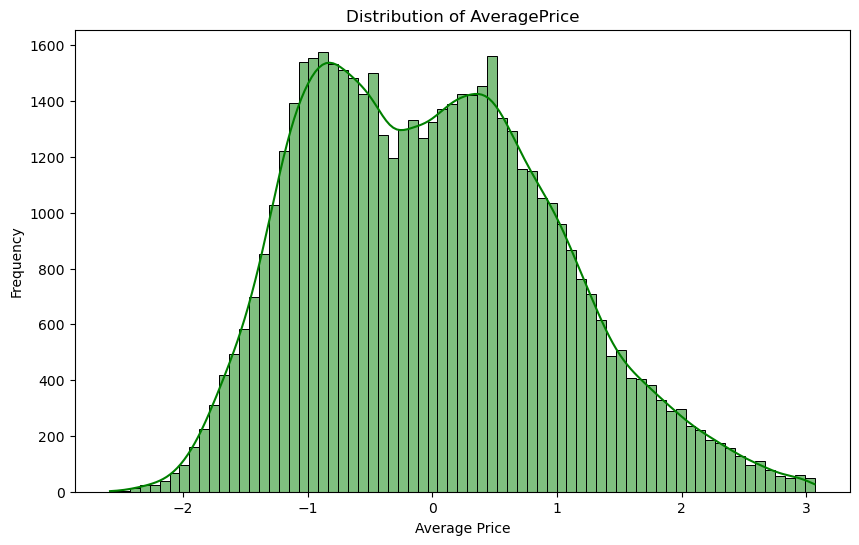

c:\Users\mahla\.conda\envs\kaelo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


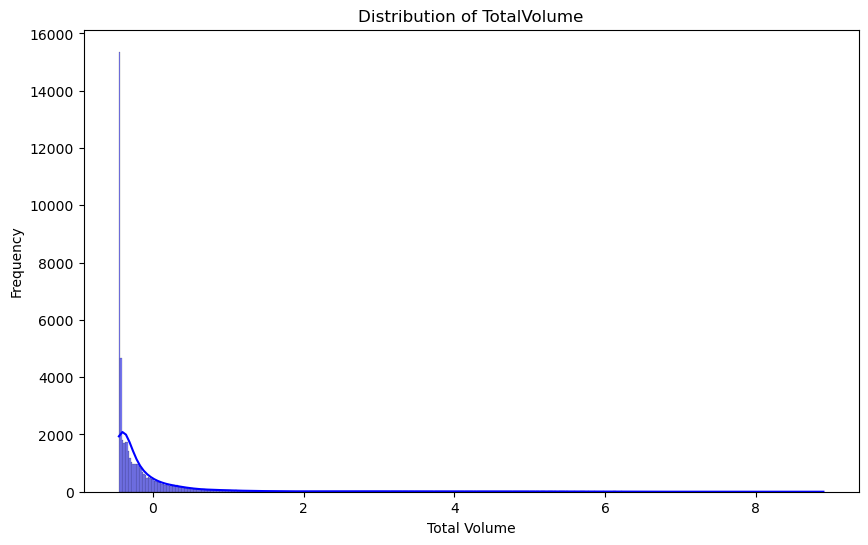

In [13]:
# Display summary statistics
print(df_cleaned.describe())

# Checking the distribution of 'AveragePrice' and 'TotalVolume'
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'AveragePrice'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['AveragePrice'], kde=True, color='green')
plt.title('Distribution of AveragePrice')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'TotalVolume'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['TotalVolume'], kde=True, color='blue')
plt.title('Distribution of TotalVolume')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.show()


 ### Visualizing Relationships between Variables
 
Now, let's examine the relationship between AveragePrice and TotalVolume

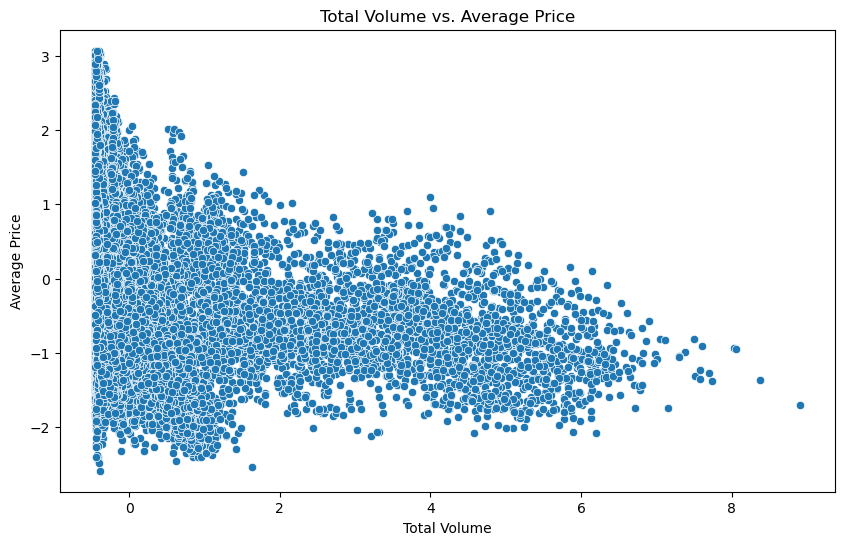

In [14]:
# Scatter plot between 'AveragePrice' and 'TotalVolume'
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalVolume', y='AveragePrice', data=df_cleaned)
plt.title('Total Volume vs. Average Price')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()


 ### Time Series Analysis
 
Since the dataset includes dates, it’s important to analyze how prices and sales volumes changed over time.

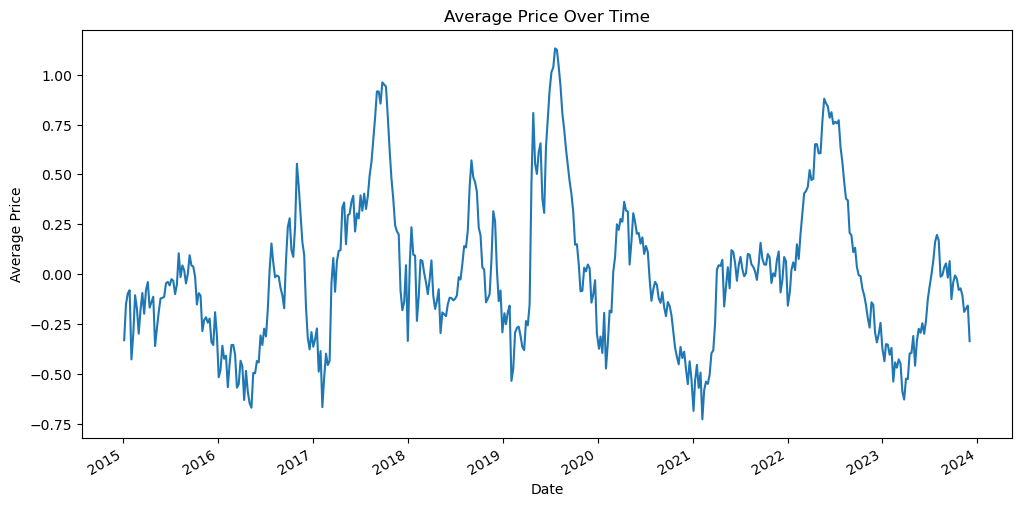

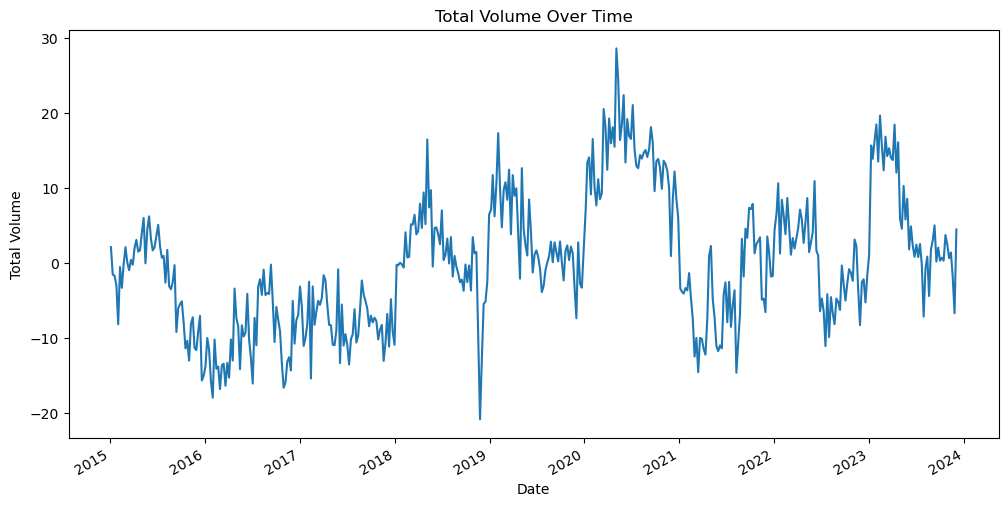

In [15]:
# Line plot of AveragePrice over time
plt.figure(figsize=(12,6))
df_cleaned.groupby('Date')['AveragePrice'].mean().plot()
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# Line plot of TotalVolume over time
plt.figure(figsize=(12,6))
df_cleaned.groupby('Date')['TotalVolume'].sum().plot()
plt.title('Total Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.show()


 ### Regional Analysis
 
Let's look at how AveragePrice and TotalVolume vary by region

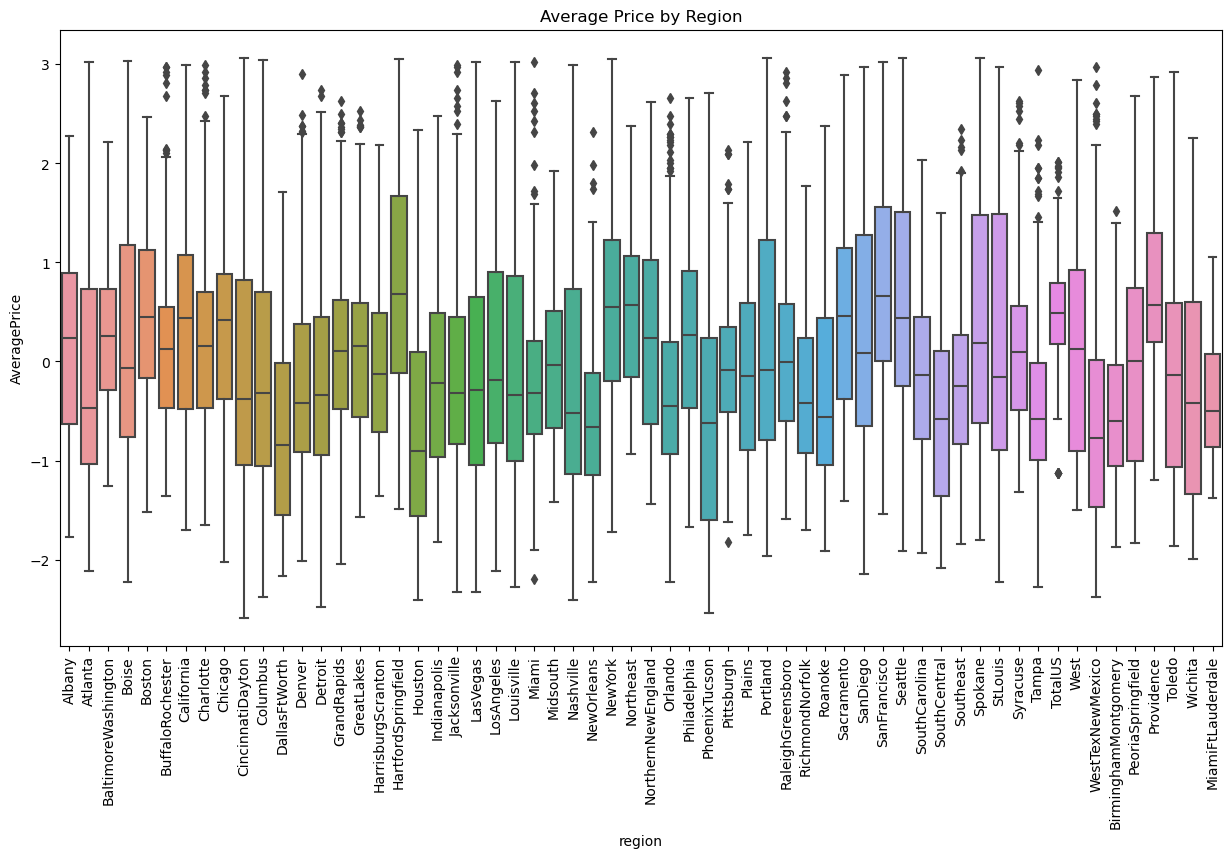

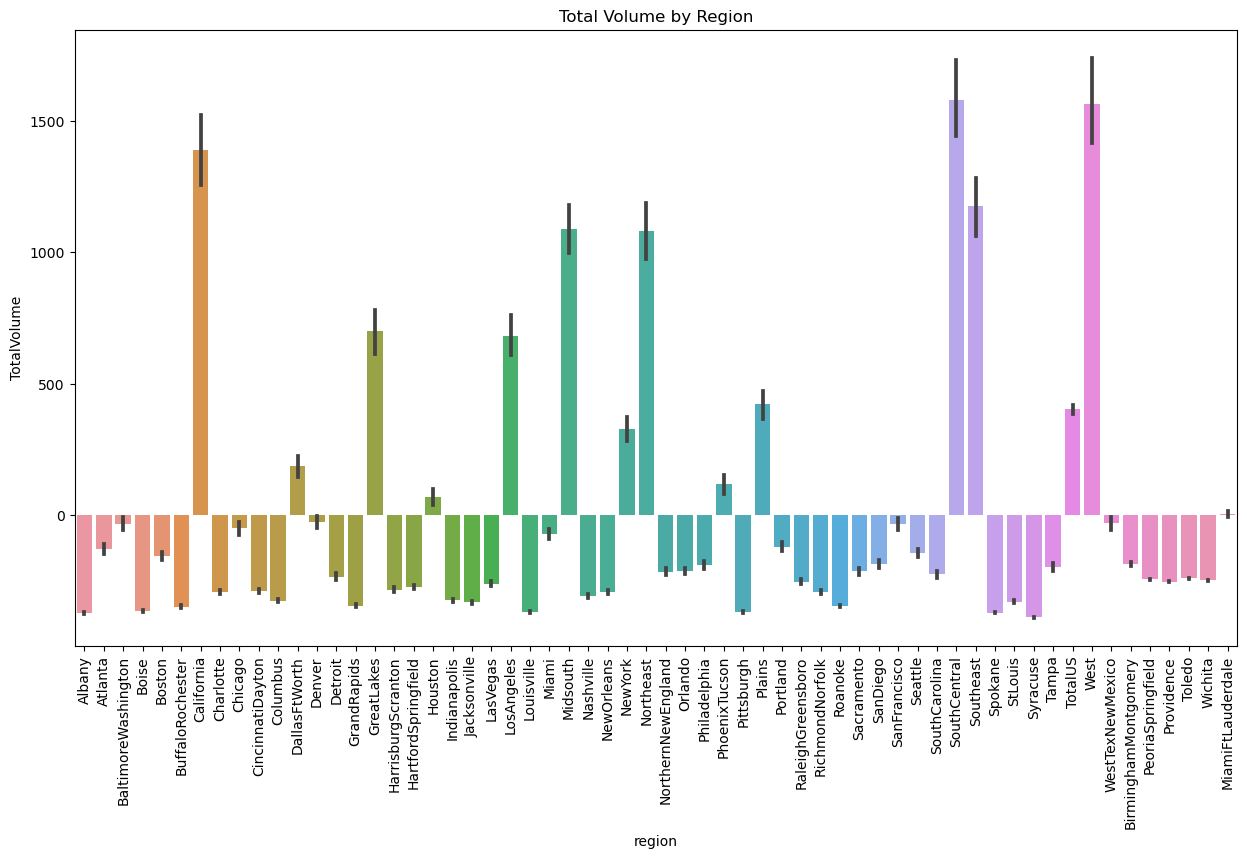

In [16]:
# Box plot for AveragePrice by region
plt.figure(figsize=(15,8))
sns.boxplot(x='region', y='AveragePrice', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Average Price by Region')
plt.show()

# Bar plot for TotalVolume by region
plt.figure(figsize=(15,8))
sns.barplot(x='region', y='TotalVolume', data=df_cleaned, estimator=sum)
plt.xticks(rotation=90)
plt.title('Total Volume by Region')
plt.show()


 ### Correlation Matrix
 
A correlation matrix helps identify the relationships between numerical variables

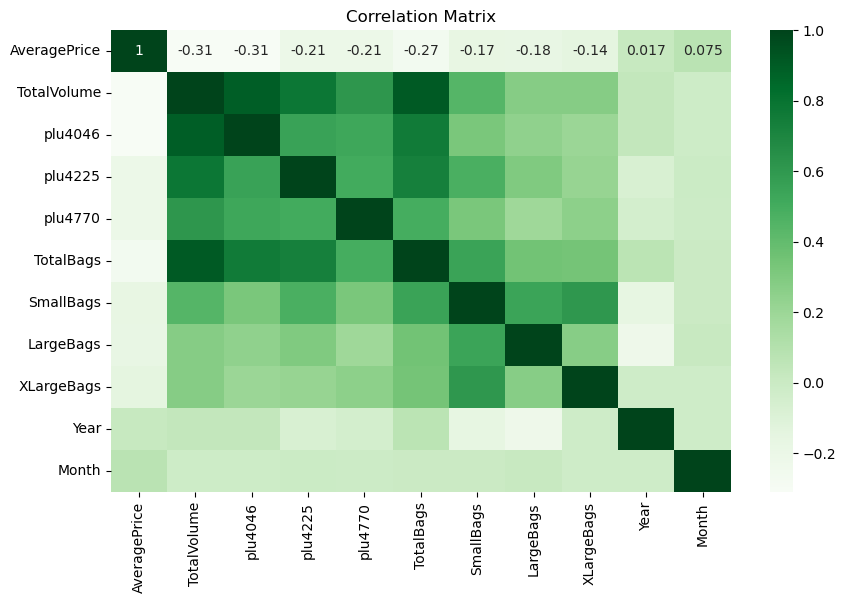

In [18]:
# Select only numeric columns for the correlation matrix
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()


<h2 id="modeling" style="color:darkgreen;">Modeling</h2>



<h2 id="evaluation-and-validation" style="color:darkgreen;">Evaluation and Validation</h2>


<h2 id="final-model" style="color:darkgreen;">Final Model</h2>


<h2 id="conclusion-and-future-work" style="color:darkgreen;">Conclusion and Future Work</h2>

<h2 id="references" style="color:darkgreen;">References</h2>